In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_original =  pd.read_csv("../datos/competencia_03.csv.gz")

In [3]:
dataset_original

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,69795509,201911,1,0,1,49,141,3038.11,28341.28,1419.93,...,3.0,0.00,-7882.56,0.00,3016.0,1726.58,7.0,0.0,13935.24,CONTINUA
1,69796585,201911,1,0,1,48,123,710.39,24637.58,-178.22,...,3.0,0.00,-3726.22,0.00,3709.0,1638.20,4.0,0.0,328.44,CONTINUA
2,69796602,201911,1,0,1,48,176,2177.32,22757.88,1088.20,...,3.0,0.00,-11974.88,0.00,2573.0,2421.48,7.0,0.0,1489.71,CONTINUA
3,69797166,201911,1,0,1,47,117,1449.66,23686.33,1508.95,...,3.0,0.00,-480.93,0.00,2092.0,1634.85,3.0,0.0,1219.92,CONTINUA
4,69798669,201911,1,0,0,46,78,30.88,412.47,0.00,...,10.0,0.00,-1032.24,0.00,2357.0,0.00,0.0,0.0,0.00,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893023,34295183,202006,0,0,0,51,268,0.00,0.00,0.00,...,-1.0,0.00,-12935.96,0.00,4331.0,3419.65,9.0,0.0,1935.45,CONTINUA
4893024,34342647,202006,0,0,0,45,200,0.00,0.00,0.00,...,6.0,0.00,NaN,NaN,5384.0,NaN,NaN,NaN,0.00,CONTINUA
4893025,34397685,202006,0,0,0,53,278,0.00,0.00,0.00,...,6.0,0.00,-20809.02,0.00,6789.0,9082.85,10.0,0.0,5114.28,CONTINUA
4893026,34414415,202006,0,0,0,72,366,0.00,0.00,0.00,...,20.0,269157.56,-297982.48,14.02,9031.0,235896.02,48.0,0.0,14850.18,CONTINUA


In [4]:
#ipc_arg =  pd.read_excel("../datos/ipc_arg.xlsx")

In [5]:
#inflacao acumulada = ipc_nivel_general_nacional - ipc_nivel_general_nacional.shift(1)
#ipc_arg['inflacion_acumulada'] =  ipc_arg['ipc_nivel_general_nacional'].shift(1) - ipc_arg['ipc_nivel_general_nacional']
#ipc_arg['indice_tiempo'] = ipc_arg['indice_tiempo'].dt.strftime('%Y%m').astype(int)
#ipc_arg.rename(columns={'indice_tiempo':'foto_mes'}, inplace=True)
#ipc_arg


In [6]:
#data_teste = dataset_original.head(5)

In [7]:
#data_teste

In [8]:
# Mesclando o dataframe original com o dataframe ipc_arg com base na coluna 'ano_mes'
#merged_df = pd.merge(dataset_original, ipc_arg[['inflacion_acumulada', 'foto_mes']], how='left', on='foto_mes')

# Calculando 'mcomisiones_atualizado' com base na inflação acumulada
#merged_df['mcomisiones_atualizado'] = merged_df['mcomisiones'] * (1 + merged_df['inflacion_acumulada'])

# Dropando a coluna 'ano_mes' se você não precisar dela mais
#merged_df = merged_df.drop('foto_mes', axis=1)
#merged_df

In [9]:
#dataset = dataset_original.copy()
dataset_baseline = dataset_original[((dataset_original['foto_mes'] >= 201903) & (dataset_original['foto_mes'] <= 201910)) | (dataset_original['foto_mes'] == 202107)]
dataset = dataset_baseline.copy()

In [64]:
dataset['foto_mes'].unique()

KeyError: 'foto_mes'

In [11]:
dataset.set_index('foto_mes', inplace=True)

In [12]:
df_roto_zero_null = ((dataset.isnull() | (dataset == 0)).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null.columns[df_roto_zero_null.eq(100).any()]].stack().reset_index()
df_roto_zero_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [13]:
df_roto_zero_bruto = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero = df_roto_zero_bruto[df_roto_zero_bruto.columns[df_roto_zero_bruto.eq(100).any()]].stack().reset_index()
df_roto_zero.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero = df_roto_zero[df_roto_zero['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [14]:
df_roto_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)
df_roto_null = df_roto_null[df_roto_null.columns[df_roto_null.eq(100).any()]].stack().reset_index()
df_roto_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_null = df_roto_null[df_roto_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

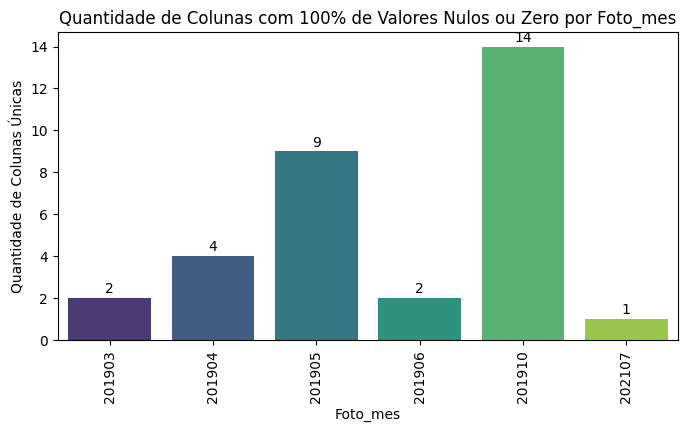

In [15]:
count_df_roto_zero_null = df_roto_zero_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Nulos ou Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

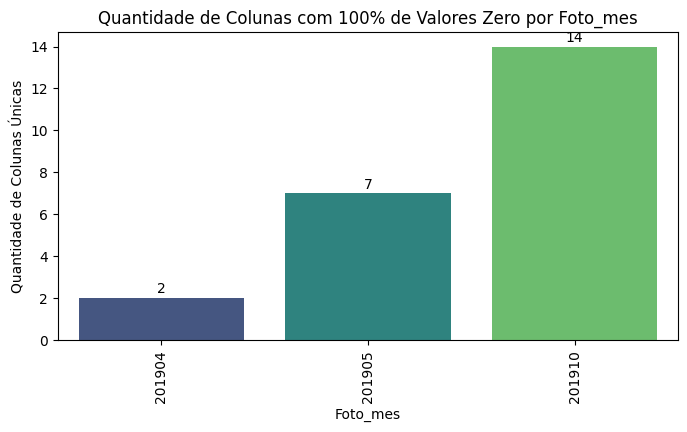

In [16]:
count_df_roto_zero = df_roto_zero.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [17]:
df_roto_zero

,foto_mes,coluna,porcentagem
21,201904,ctarjeta_visa_debitos_automaticos,100.0
22,201904,mttarjeta_visa_debitos_automaticos,100.0
32,201905,mrentabilidad,100.0
33,201905,mrentabilidad_annual,100.0
34,201905,mcomisiones,100.0
35,201905,mactivos_margen,100.0
36,201905,mpasivos_margen,100.0
45,201905,ccomisiones_otras,100.0
46,201905,mcomisiones_otras,100.0
125,201910,ccomisiones_otras,100.0


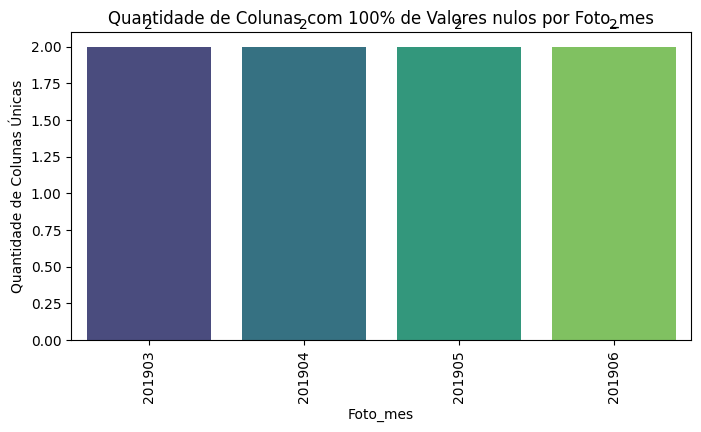

In [18]:
count_df_roto_null = df_roto_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [19]:
#Exclui os valores de cmobile_app_trx e tmobile_app para os anos de 201901 ate 201906 porque todos os valores estao null, talvez nao tinha essa funcionalidade na epoca no sistema

merged_df = pd.merge(count_df_roto_zero_null, count_df_roto_null, on='foto_mes', how='outer', suffixes=('_zero', '_null'))
merged_df = merged_df.fillna(0)
merged_df['quantidade_colunas'] =  merged_df['quantidade_colunas_zero'] - merged_df['quantidade_colunas_null']


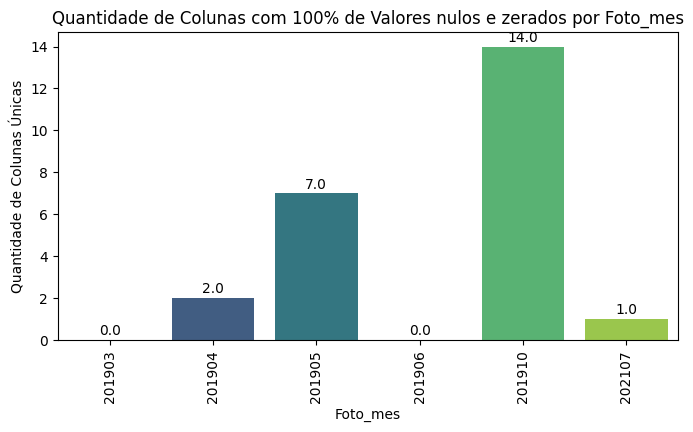

In [20]:

plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=merged_df, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos e zerados por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(merged_df['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [21]:
df_parcial_zero = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_parcial_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)

In [22]:
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)
filtered_columns

numero_de_cliente          False
active_quarter             False
cliente_vip                False
internet                   False
cliente_edad               False
                           ...  
Visa_mconsumototal         False
Visa_cconsumos             False
Visa_cadelantosefectivo    False
Visa_mpagominimo           False
clase_ternaria             False
Length: 154, dtype: bool

In [23]:
df_parcial_zero_filtered = df_parcial_zero.loc[:, filtered_columns]
df_parcial_null_filtered = df_parcial_null.loc[:, filtered_columns]

In [24]:
df_parcial_zero_filtered

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccomisiones_otras,mcomisiones_otras,chomebanking_transacciones,tmobile_app,cmobile_app_trx,Master_madelantodolares
foto_mes,,,,,,,,,,,,,,,,,,,
201903,0.25,0.22,2.54,3.86,1.26,33.24,33.24,95.39,96.01,92.70,93.04,97.80,97.93,2.54,2.54,35.83,0.00,0.00,42.62
201904,0.25,0.22,2.53,4.06,1.22,100.00,100.00,95.62,96.31,91.01,91.43,97.28,97.46,2.53,2.53,40.94,0.00,0.00,42.47
201905,100.00,100.00,100.00,100.00,100.00,33.25,33.25,95.55,96.23,89.42,89.81,96.40,96.57,100.00,100.00,47.70,0.00,0.00,42.10
201906,0.24,0.21,2.75,3.81,1.13,33.32,33.32,94.94,95.92,88.94,89.58,96.55,96.82,2.75,2.75,48.27,0.00,0.00,41.31
201907,0.26,0.23,2.58,4.39,1.07,32.98,32.98,94.84,96.08,89.79,90.69,96.59,96.96,2.58,2.58,43.82,46.88,47.23,41.44
201908,0.29,0.25,2.77,4.48,1.34,33.34,33.34,95.88,96.58,92.55,92.95,97.95,98.14,2.77,2.77,44.31,45.92,46.12,40.83
201909,0.31,0.27,3.38,4.22,1.06,33.56,33.56,96.05,96.59,93.39,93.65,98.12,98.24,3.38,3.38,44.89,45.49,45.82,40.01
201910,100.00,100.00,100.00,100.00,100.00,33.56,33.56,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,44.19,44.50,40.28
202107,0.16,0.14,2.86,4.23,1.15,34.81,34.81,96.52,96.54,93.93,94.33,94.52,94.96,2.86,2.86,15.33,97.63,21.56,42.47


In [25]:
df_parcial_null_filtered

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccomisiones_otras,mcomisiones_otras,chomebanking_transacciones,tmobile_app,cmobile_app_trx,Master_madelantodolares
foto_mes,,,,,,,,,,,,,,,,,,,
201903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.51,0.0,0.25,0.0,0.0,0.0,100.0,100.0,57.36
201904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.84,0.0,0.32,0.0,0.0,0.0,100.0,100.0,57.51
201905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.83,0.0,0.30,0.0,0.0,0.0,100.0,100.0,57.89
201906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.51,0.0,0.41,0.0,0.0,0.0,100.0,100.0,58.67
201907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.68,0.0,0.59,0.0,0.0,0.0,0.0,0.0,58.55
201908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.54,0.0,0.45,0.0,0.0,0.0,0.0,0.0,59.15
201909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.79,0.0,0.30,0.0,0.0,0.0,0.0,0.0,59.98
201910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,59.70
202107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.65,0.0,2.70,0.0,0.0,0.0,0.0,0.0,57.53


In [26]:
bool_index = df_parcial_zero_filtered.index.isin(df_parcial_null_filtered.index)


In [27]:
bool_index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [28]:
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)


In [29]:
filtered_columns_true = filtered_columns[filtered_columns == True].index

In [30]:
filtered_columns_true

Index(['mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       'mactivos_margen', 'mpasivos_margen',
       'ctarjeta_visa_debitos_automaticos',
       'mttarjeta_visa_debitos_automaticos', 'ccajeros_propios_descuentos',
       'mcajeros_propios_descuentos', 'ctarjeta_visa_descuentos',
       'mtarjeta_visa_descuentos', 'ctarjeta_master_descuentos',
       'mtarjeta_master_descuentos', 'ccomisiones_otras', 'mcomisiones_otras',
       'chomebanking_transacciones', 'tmobile_app', 'cmobile_app_trx',
       'Master_madelantodolares'],
      dtype='object')

In [31]:
df_parcial_zero[filtered_columns_true].stack().reset_index(name='quantidade_zero')

,foto_mes,level_1,quantidade_zero
0,201903,mrentabilidad,0.25
1,201903,mrentabilidad_annual,0.22
2,201903,mcomisiones,2.54
3,201903,mactivos_margen,3.86
4,201903,mpasivos_margen,1.26
...,...,...,...
166,202107,mcomisiones_otras,2.86
167,202107,chomebanking_transacciones,15.33
168,202107,tmobile_app,97.63
169,202107,cmobile_app_trx,21.56


In [32]:
df_parcial_null[filtered_columns_true].stack().reset_index(name='quantidade_null')

,foto_mes,level_1,quantidade_null
0,201903,mrentabilidad,0.00
1,201903,mrentabilidad_annual,0.00
2,201903,mcomisiones,0.00
3,201903,mactivos_margen,0.00
4,201903,mpasivos_margen,0.00
...,...,...,...
166,202107,mcomisiones_otras,0.00
167,202107,chomebanking_transacciones,0.00
168,202107,tmobile_app,0.00
169,202107,cmobile_app_trx,0.00


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você tenha df_parcial_zero e df_parcial_null disponíveis

# Filtrar colunas onde a soma das porcentagens de valores zero e nulos é igual a 100
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)

# Selecionar apenas as colunas relevantes
df_parcial_zero_filtered = df_parcial_zero[filtered_columns_true].stack().reset_index(name='quantidade_zero')
df_parcial_null_filtered = df_parcial_null[filtered_columns_true].stack().reset_index(name='quantidade_null')

# Mesclar os dois dataframes
df_merged = pd.merge(df_parcial_zero_filtered, df_parcial_null_filtered, on=['foto_mes', 'level_1'])
df_merged = df_merged[(df_merged['quantidade_zero'] + df_merged['quantidade_null']) == 100]


In [34]:
df_merged

,foto_mes,level_1,quantidade_zero,quantidade_null
16,201903,tmobile_app,0.00,100.00
17,201903,cmobile_app_trx,0.00,100.00
24,201904,ctarjeta_visa_debitos_automaticos,100.00,0.00
25,201904,mttarjeta_visa_debitos_automaticos,100.00,0.00
35,201904,tmobile_app,0.00,100.00
36,201904,cmobile_app_trx,0.00,100.00
38,201905,mrentabilidad,100.00,0.00
39,201905,mrentabilidad_annual,100.00,0.00
40,201905,mcomisiones,100.00,0.00
41,201905,mactivos_margen,100.00,0.00


In [35]:
colunas_imputar = df_roto_zero['coluna'].unique()

In [36]:
colunas_imputar

array(['ctarjeta_visa_debitos_automaticos',
       'mttarjeta_visa_debitos_automaticos', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       'mpasivos_margen', 'ccomisiones_otras', 'mcomisiones_otras',
       'mtarjeta_master_descuentos', 'ctarjeta_master_descuentos',
       'mtarjeta_visa_descuentos', 'ctarjeta_visa_descuentos',
       'mcajeros_propios_descuentos', 'ccajeros_propios_descuentos',
       'chomebanking_transacciones'], dtype=object)

In [37]:
#passar colunas com zero para na
dataset[colunas_imputar] = dataset[colunas_imputar].replace(0, np.nan)

/var/folders/rz/cr5j7s253gzd4kgkncpwqkg00000gp/T/ipykernel_45818/439258706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[colunas_imputar] = dataset[colunas_imputar].replace(0, np.nan)


In [38]:
dataset[colunas_imputar].isna().sum()   

ctarjeta_visa_debitos_automaticos      490081
mttarjeta_visa_debitos_automaticos     490081
mrentabilidad                          266552
mrentabilidad_annual                   266254
mcomisiones                            290468
mactivos_margen                        303461
mpasivos_margen                        275296
ccomisiones_otras                      290449
mcomisiones_otras                      290469
mtarjeta_master_descuentos            1185521
ctarjeta_master_descuentos            1175076
mtarjeta_visa_descuentos              1148310
ctarjeta_visa_descuentos              1118545
mcajeros_propios_descuentos           1169330
ccajeros_propios_descuentos           1162260
chomebanking_transacciones             558607
dtype: int64

In [39]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [40]:
dataset_original[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4818336.000,4893028.000,4810103.000,4893028.000,4893028.000,4893028.000,4893028.000
mean,2.373,5461.627,2278.755,25661.771,1141.793,-617.412,1586.546,8.248,1148.173,13.750,0.054,43.414,0.092,16.734,0.064,40.732
std,3.200,11103.566,7067.582,60974.377,2799.223,3351.625,4560.329,7.421,2822.936,274.097,0.464,455.214,0.483,167.108,0.473,72.968
min,0.000,0.000,-1948808.830,-1862286.080,-1953482.100,-555339.210,-125969.940,0.000,-1953482.100,0.000,0.000,0.000,0.000,-246.330,0.000,0.000
25%,0.000,0.000,0.000,2872.870,148.850,-1126.320,150.900,4.000,149.350,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,1149.540,1149.410,14039.100,613.100,-214.760,614.850,8.000,615.170,0.000,0.000,0.000,0.000,0.000,0.000,11.000
75%,3.000,6269.270,2782.950,30420.625,1512.120,0.000,1563.990,11.000,1516.650,0.000,0.000,0.000,0.000,0.000,0.000,55.000
max,75.000,769131.930,2599540.050,11161405.720,1959169.310,568198.100,1799988.850,292.000,1959169.310,124292.830,58.000,118224.210,57.000,53538.070,44.000,10387.000


In [41]:
dataset[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,719008.000,719008.000,942537.000,942835.000,918621.000,905628.000,933793.000,918640.000,918620.000,23568.000,34013.000,60779.000,90544.000,39759.000,46829.000,650482.000
mean,3.809,7440.161,3168.824,31307.869,1163.058,-538.629,2273.642,9.640,1170.109,828.316,1.485,942.979,1.576,493.769,2.023,25.389
std,3.328,11167.431,7722.572,60249.580,3332.894,2791.988,5297.022,7.200,3358.322,1781.027,1.108,1726.461,1.241,733.539,2.058,53.739
min,1.000,0.010,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,1.000,-1953482.100,0.170,1.000,0.110,1.000,-51.840,1.000,1.000
25%,1.000,1342.360,733.130,9461.440,245.540,-964.015,397.910,6.000,245.930,139.213,1.000,164.320,1.000,94.770,1.000,3.000
50%,3.000,3853.965,1714.640,18233.140,724.860,-270.620,1014.790,8.000,727.020,408.960,1.000,441.510,1.000,235.360,1.000,7.000
75%,5.000,8948.260,3474.630,34108.860,1430.190,40.953,2287.710,12.000,1433.723,869.213,2.000,1127.295,2.000,644.815,2.000,21.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [42]:
#dataset sem periodo zerado 
dataset_original[colunas_imputar][(dataset_original['foto_mes'] >= 201904) & (dataset_original['foto_mes'] <= 201909)].describe()


,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,778263.000,781356.000,762866.000,781356.000,781356.000,781356.000,781356.000
mean,2.097,3720.931,2702.307,27916.606,858.277,-347.487,1919.495,8.006,863.862,17.182,0.042,57.386,0.147,16.851,0.094,5.502
std,3.066,7879.545,6650.039,56048.119,2111.626,1913.541,4896.150,7.430,2136.302,284.688,0.307,452.636,0.603,146.915,0.635,18.951
min,0.000,0.000,-202220.120,-1858705.730,-54072.560,-181435.160,-28681.220,0.000,-53983.240,0.000,0.000,0.000,0.000,-51.840,0.000,0.000
25%,0.000,0.000,112.440,5320.130,42.120,-670.260,99.010,4.000,42.150,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,375.360,1291.600,15565.875,418.710,-77.020,735.810,8.000,419.610,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,3.000,4211.970,2893.020,30490.130,1166.880,0.000,1934.983,12.000,1169.875,0.000,0.000,0.000,0.000,0.000,0.000,5.000
max,55.000,577457.570,894482.140,6246624.680,322021.440,400016.110,667148.640,182.000,322021.440,124292.830,19.000,85508.390,27.000,9763.040,41.000,3290.000


* ctarjeta_visa_debitos_automaticos	--	Cantidad de débitos automáticos debitados durante el mes en las tarjeta de crédito VISA
* mtarjeta_visa_debitos_automaticos	pesos	Monto total de  débitos automáticos debitados durante el mes en la tarjeta de crédito VISA . Todo está convertido a pesos argentinos, al valor de la fecha de cierre del utlimo dia habil del mes.
* mrentabilidad	pesos	Ganancia total que ha obtenido el banco de ese cliente, en ese mes.
* mrentabilidad_annual	pesos	Ganancia total que el banco ha obtenido de ese cliente en el ultimo año de relacion cliente-banco,  o meses desde que ingresó si es cliente reciente.
* mcomisiones	pesos	Monto total de las comisiones que ha ganado el banco por ese cliente.
* mactivos_margen	pesos	Monto total de la ganancia que el banco ha obtenido en concepto de intereses que ha cobrado al cliente.
* mpasivos_margen	pesos	Monto total de la ganancia que el banco ha obtenido por el dinero/inversiones que el cliente tiene en el banco.
* ccomisiones_otras	--	Cantidad de otras comisiones que se cobraron al cliente durante el mes.
* mcomisiones_otras	pesos	Monto total en pesos de otras comisiones que se cobraron al cliente durante el mes.


In [43]:
dataset_inputar = dataset_baseline.copy()

In [44]:
dataset_inputar[colunas_imputar].isna().sum()

ctarjeta_visa_debitos_automaticos         0
mttarjeta_visa_debitos_automaticos        0
mrentabilidad                             0
mrentabilidad_annual                      0
mcomisiones                               0
mactivos_margen                           0
mpasivos_margen                           0
ccomisiones_otras                         0
mcomisiones_otras                         0
mtarjeta_master_descuentos             3093
ctarjeta_master_descuentos                0
mtarjeta_visa_descuentos              18490
ctarjeta_visa_descuentos                  0
mcajeros_propios_descuentos               0
ccajeros_propios_descuentos               0
chomebanking_transacciones                0
dtype: int64

In [45]:
dataset_inputar[colunas_imputar] = dataset_inputar[colunas_imputar].replace(0, np.nan)

/var/folders/rz/cr5j7s253gzd4kgkncpwqkg00000gp/T/ipykernel_45818/151757495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_inputar[colunas_imputar] = dataset_inputar[colunas_imputar].replace(0, np.nan)


In [46]:
np.append(['foto_mes', 'numero_de_cliente'], colunas_imputar)

array(['foto_mes', 'numero_de_cliente',
       'ctarjeta_visa_debitos_automaticos',
       'mttarjeta_visa_debitos_automaticos', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       'mpasivos_margen', 'ccomisiones_otras', 'mcomisiones_otras',
       'mtarjeta_master_descuentos', 'ctarjeta_master_descuentos',
       'mtarjeta_visa_descuentos', 'ctarjeta_visa_descuentos',
       'mcajeros_propios_descuentos', 'ccajeros_propios_descuentos',
       'chomebanking_transacciones'], dtype=object)

In [47]:
dataset_inputar

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
244824,112470962,201906,1,0,1,37,92,182.960,21076.660,153.550,...,4.000,0.000,0.000,0.000,2078.000,393.810,2.000,0.000,340.170,CONTINUA
244825,112471475,201906,1,0,1,28,92,138.050,6498.850,226.520,...,12.000,23460.000,-4117.230,0.000,2611.000,11377.630,7.000,0.000,6146.520,CONTINUA
244826,112473055,201906,1,0,1,39,92,13212.770,131708.120,240.450,...,4.000,0.000,NaN,NaN,1985.000,NaN,NaN,NaN,0.000,CONTINUA
244827,112474259,201906,1,0,1,48,92,2503.170,31616.530,1118.290,...,4.000,0.000,-28198.920,0.000,2660.000,22105.180,10.000,0.000,30955.470,CONTINUA
244828,112474489,201906,0,0,0,53,92,835.250,946.840,830.900,...,4.000,0.000,NaN,NaN,2462.000,NaN,NaN,NaN,0.000,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870741,127675174,201904,1,0,1,49,53,6977.490,67127.360,3787.680,...,-1.000,0.000,-30970.840,17.360,1595.000,14725.220,43.000,0.000,0.000,CONTINUA
4870742,126355597,201904,1,0,1,65,41,1534.090,13787.260,1048.590,...,-1.000,0.000,-809.330,0.000,826.000,0.000,0.000,0.000,387.090,CONTINUA
4870743,126368424,201904,1,0,1,40,55,4110.400,26091.210,420.250,...,-1.000,0.000,-54378.020,8.150,1659.000,46564.730,15.000,0.000,13993.890,CONTINUA
4870744,126740458,201904,1,0,1,33,56,631.700,7453.920,193.290,...,6.000,0.000,-9424.360,0.000,1511.000,595.300,2.000,0.000,93.840,CONTINUA


In [48]:
#dataset_inputar = dataset_inputar[np.append(['foto_mes', 'numero_de_cliente'], colunas_imputar)]

In [49]:
dataset_inputar

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
244824,112470962,201906,1,0,1,37,92,182.960,21076.660,153.550,...,4.000,0.000,0.000,0.000,2078.000,393.810,2.000,0.000,340.170,CONTINUA
244825,112471475,201906,1,0,1,28,92,138.050,6498.850,226.520,...,12.000,23460.000,-4117.230,0.000,2611.000,11377.630,7.000,0.000,6146.520,CONTINUA
244826,112473055,201906,1,0,1,39,92,13212.770,131708.120,240.450,...,4.000,0.000,NaN,NaN,1985.000,NaN,NaN,NaN,0.000,CONTINUA
244827,112474259,201906,1,0,1,48,92,2503.170,31616.530,1118.290,...,4.000,0.000,-28198.920,0.000,2660.000,22105.180,10.000,0.000,30955.470,CONTINUA
244828,112474489,201906,0,0,0,53,92,835.250,946.840,830.900,...,4.000,0.000,NaN,NaN,2462.000,NaN,NaN,NaN,0.000,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870741,127675174,201904,1,0,1,49,53,6977.490,67127.360,3787.680,...,-1.000,0.000,-30970.840,17.360,1595.000,14725.220,43.000,0.000,0.000,CONTINUA
4870742,126355597,201904,1,0,1,65,41,1534.090,13787.260,1048.590,...,-1.000,0.000,-809.330,0.000,826.000,0.000,0.000,0.000,387.090,CONTINUA
4870743,126368424,201904,1,0,1,40,55,4110.400,26091.210,420.250,...,-1.000,0.000,-54378.020,8.150,1659.000,46564.730,15.000,0.000,13993.890,CONTINUA
4870744,126740458,201904,1,0,1,33,56,631.700,7453.920,193.290,...,6.000,0.000,-9424.360,0.000,1511.000,595.300,2.000,0.000,93.840,CONTINUA


<Axes: >

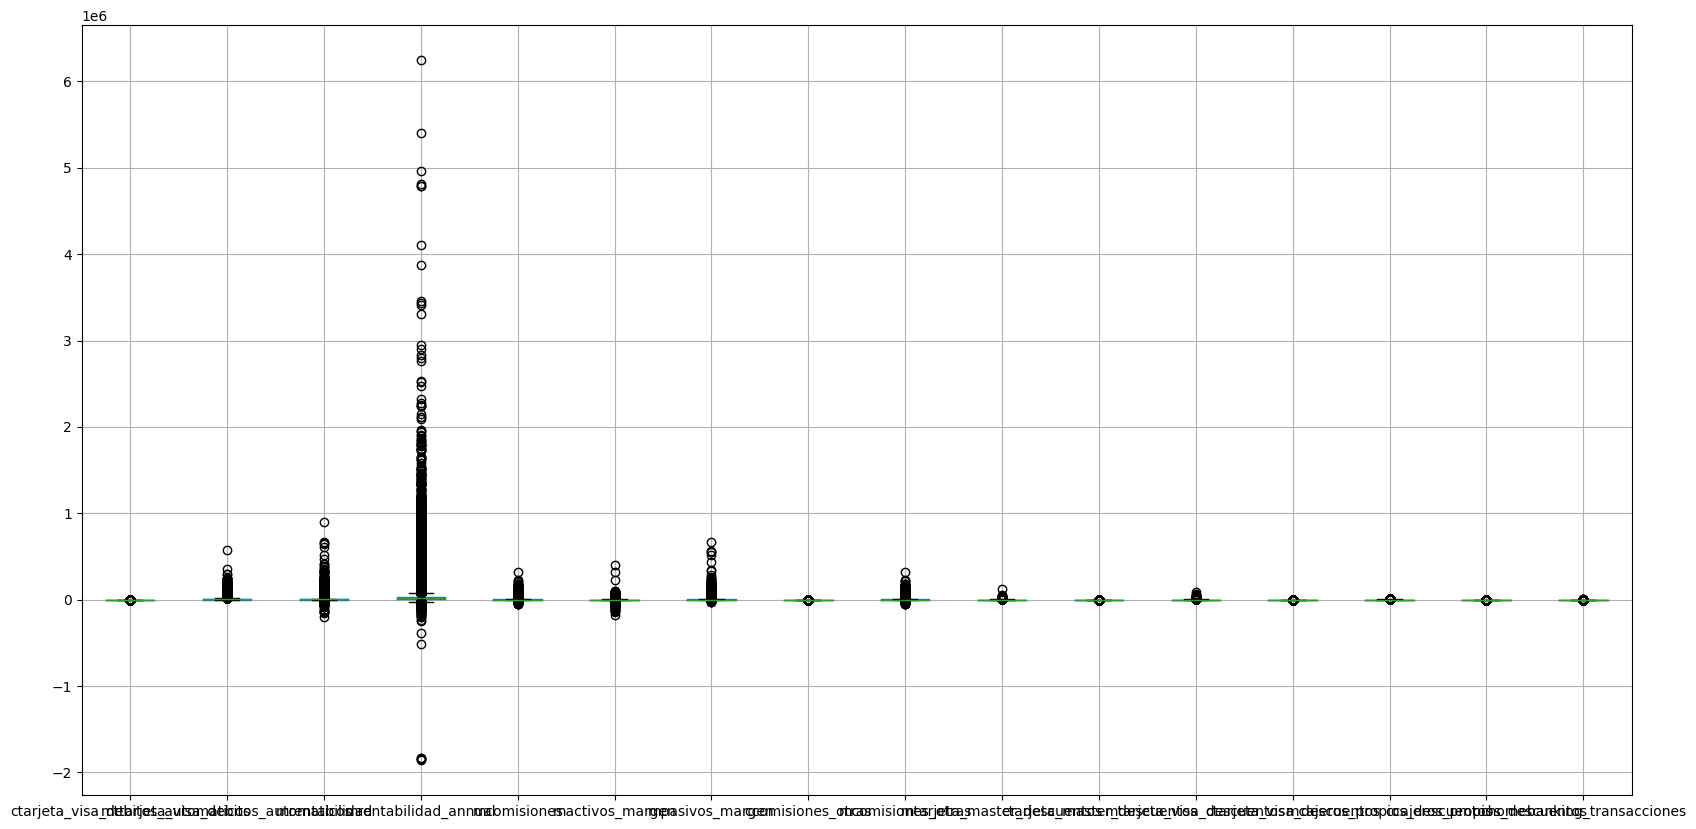

In [50]:
#verificar se possui outliers
dataset_inputar[colunas_imputar].boxplot(figsize=(20,10))

In [51]:
#preencher valores nulos com a media
dataset_inputado_media = dataset_inputar.copy()
dataset_inputado_mediana = dataset_inputar.copy()

dataset_inputado_media[colunas_imputar] = dataset_inputar[colunas_imputar].fillna(dataset_inputar[colunas_imputar].mean())
dataset_inputado_mediana[colunas_imputar] = dataset_inputar[colunas_imputar].fillna(dataset_inputar[colunas_imputar].median())

In [52]:
dataset_inputar[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,436466.000,436466.000,651895.000,652125.000,635328.000,626263.000,646066.000,635341.000,635327.000,17420.000,22201.000,48897.000,71304.000,29009.000,35277.000,429843.000
mean,3.753,6661.165,3238.963,33448.814,1055.549,-433.542,2321.449,9.846,1062.419,767.612,1.473,895.301,1.606,453.881,2.085,10.002
std,3.258,9568.829,7160.108,59823.684,2296.871,2128.645,5297.085,7.055,2324.180,1744.999,1.098,1564.061,1.282,618.886,2.184,24.654
min,1.000,0.010,-202220.120,-1858705.730,-54072.560,-181435.160,-28681.220,1.000,-53983.240,0.230,1.000,0.110,1.000,-51.840,1.000,1.000
25%,1.000,1251.590,761.300,10724.560,223.988,-875.170,404.010,6.000,224.410,112.600,1.000,161.870,1.000,84.450,1.000,2.000
50%,3.000,3589.980,1680.770,19264.880,672.160,-256.760,1034.325,9.000,674.390,351.720,1.000,436.540,1.000,189.600,1.000,5.000
75%,5.000,8111.408,3413.155,35187.370,1330.960,31.940,2341.758,12.000,1334.090,878.760,2.000,1122.560,2.000,583.370,2.000,9.000
max,55.000,577457.570,894482.140,6246624.680,322021.440,400016.110,667148.640,182.000,322021.440,124292.830,19.000,85508.390,27.000,9763.040,41.000,3290.000


In [53]:
dataset_inputado_media[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000
mean,3.753,6661.165,3238.963,33448.814,1055.549,-433.542,2321.449,9.846,1062.419,767.612,1.473,895.301,1.606,453.881,2.085,10.002
std,2.435,7151.700,6540.092,54653.005,2071.147,1905.711,4816.714,6.362,2095.772,260.545,0.185,391.261,0.387,119.246,0.464,18.286
min,1.000,0.010,-202220.120,-1858705.730,-54072.560,-181435.160,-28681.220,1.000,-53983.240,0.230,1.000,0.110,1.000,-51.840,1.000,1.000
25%,2.000,3042.168,941.790,12284.807,298.110,-670.260,517.060,6.000,298.690,767.612,1.473,895.301,1.606,453.881,2.085,4.000
50%,3.753,6661.165,2173.895,23831.790,973.695,-433.542,1429.395,9.846,975.970,767.612,1.473,895.301,1.606,453.881,2.085,10.002
75%,3.753,6661.165,3238.963,33448.814,1166.880,-9.600,2321.449,12.000,1169.875,767.612,1.473,895.301,1.606,453.881,2.085,10.002
max,55.000,577457.570,894482.140,6246624.680,322021.440,400016.110,667148.640,182.000,322021.440,124292.830,19.000,85508.390,27.000,9763.040,41.000,3290.000


In [54]:
dataset_inputado_mediana[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000
mean,3.421,5305.546,2980.790,31102.887,983.897,-398.452,2098.586,9.688,989.899,360.992,1.013,465.249,1.055,199.412,1.049,7.751
std,2.464,7312.487,6565.702,54906.485,2076.533,1907.016,4841.272,6.371,2101.223,267.682,0.201,406.732,0.425,129.292,0.516,18.454
min,1.000,0.010,-202220.120,-1858705.730,-54072.560,-181435.160,-28681.220,1.000,-53983.240,0.230,1.000,0.110,1.000,-51.840,1.000,1.000
25%,2.000,3042.168,941.790,12284.807,298.110,-670.260,517.060,6.000,298.690,351.720,1.000,436.540,1.000,189.600,1.000,4.000
50%,3.000,3589.980,1680.770,19264.880,672.160,-256.760,1034.325,9.000,674.390,351.720,1.000,436.540,1.000,189.600,1.000,5.000
75%,3.000,4211.970,2893.020,30490.130,1166.880,-9.600,1934.983,12.000,1169.875,351.720,1.000,436.540,1.000,189.600,1.000,5.000
max,55.000,577457.570,894482.140,6246624.680,322021.440,400016.110,667148.640,182.000,322021.440,124292.830,19.000,85508.390,27.000,9763.040,41.000,3290.000


In [55]:
dataset_inputado_mediana[colunas_imputar].mean()

ctarjeta_visa_debitos_automaticos        3.421
mttarjeta_visa_debitos_automaticos    5305.546
mrentabilidad                         2980.790
mrentabilidad_annual                 31102.887
mcomisiones                            983.897
mactivos_margen                       -398.452
mpasivos_margen                       2098.586
ccomisiones_otras                        9.688
mcomisiones_otras                      989.899
mtarjeta_master_descuentos             360.992
ctarjeta_master_descuentos               1.013
mtarjeta_visa_descuentos               465.249
ctarjeta_visa_descuentos                 1.055
mcajeros_propios_descuentos            199.412
ccajeros_propios_descuentos              1.049
chomebanking_transacciones               7.751
dtype: float64

In [56]:
dataset_inputado_mediana[colunas_imputar].median()

ctarjeta_visa_debitos_automaticos        3.000
mttarjeta_visa_debitos_automaticos    3589.980
mrentabilidad                         1680.770
mrentabilidad_annual                 19264.880
mcomisiones                            672.160
mactivos_margen                       -256.760
mpasivos_margen                       1034.325
ccomisiones_otras                        9.000
mcomisiones_otras                      674.390
mtarjeta_master_descuentos             351.720
ctarjeta_master_descuentos               1.000
mtarjeta_visa_descuentos               436.540
ctarjeta_visa_descuentos                 1.000
mcajeros_propios_descuentos            189.600
ccajeros_propios_descuentos              1.000
chomebanking_transacciones               5.000
dtype: float64

In [57]:
#adicionar dados de 

In [58]:
#gravar datasets em csv
dataset_inputar.to_csv('../datos/dataset_sem_inputar.csv.gz', index=False)
dataset_inputado_media.to_csv('../datos/dataset_inputado_media.csv.gz', index=False)
dataset_inputado_mediana.to_csv('../datos/dataset_inputado_mediana.csv.gz', index=False)


In [65]:
dataset_inputar

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
244824,112470962,201906,1,0,1,37,92,182.960,21076.660,153.550,...,4.000,0.000,0.000,0.000,2078.000,393.810,2.000,0.000,340.170,CONTINUA
244825,112471475,201906,1,0,1,28,92,138.050,6498.850,226.520,...,12.000,23460.000,-4117.230,0.000,2611.000,11377.630,7.000,0.000,6146.520,CONTINUA
244826,112473055,201906,1,0,1,39,92,13212.770,131708.120,240.450,...,4.000,0.000,NaN,NaN,1985.000,NaN,NaN,NaN,0.000,CONTINUA
244827,112474259,201906,1,0,1,48,92,2503.170,31616.530,1118.290,...,4.000,0.000,-28198.920,0.000,2660.000,22105.180,10.000,0.000,30955.470,CONTINUA
244828,112474489,201906,0,0,0,53,92,835.250,946.840,830.900,...,4.000,0.000,NaN,NaN,2462.000,NaN,NaN,NaN,0.000,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870741,127675174,201904,1,0,1,49,53,6977.490,67127.360,3787.680,...,-1.000,0.000,-30970.840,17.360,1595.000,14725.220,43.000,0.000,0.000,CONTINUA
4870742,126355597,201904,1,0,1,65,41,1534.090,13787.260,1048.590,...,-1.000,0.000,-809.330,0.000,826.000,0.000,0.000,0.000,387.090,CONTINUA
4870743,126368424,201904,1,0,1,40,55,4110.400,26091.210,420.250,...,-1.000,0.000,-54378.020,8.150,1659.000,46564.730,15.000,0.000,13993.890,CONTINUA
4870744,126740458,201904,1,0,1,33,56,631.700,7453.920,193.290,...,6.000,0.000,-9424.360,0.000,1511.000,595.300,2.000,0.000,93.840,CONTINUA


In [60]:
dataset_inputado_media.shape

(781356, 155)

In [61]:
dataset_inputado_mediana.shape

(781356, 155)

In [62]:
dataset_origina['foto_mes'].shape

NameError: name 'dataset_origina' is not defined